In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
df = pd.read_csv('auto-mpg.csv', na_values='?')

In [4]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
missing_values = df.isnull().sum()
print(missing_values)


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [6]:
df = df.dropna(subset=['horsepower'])

In [7]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [12]:


skewness = df.skew(numeric_only=True)


kurtosis = df.kurt(numeric_only=True)

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

Kurtosis:
 mpg            -0.515993
cylinders      -1.398199
displacement   -0.778317
horsepower      0.696947
weight         -0.809259
acceleration    0.444234
model year     -1.167446
origin         -0.841885
dtype: float64


In [15]:
numeric_df = df.select_dtypes(include=[np.number])
df_cleaned = df.drop(columns=['car name'])


In [17]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['car name'], dtype='object')


In [18]:
df_cleaned = df.drop(columns=['car name'])

In [19]:
corr_matrix = df_cleaned.corr()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'car name' column
df['car name encoded'] = label_encoder.fit_transform(df['car name'])


df_cleaned = df.drop(columns=['car name'])

# Recalculate the correlation matrix with the encoded column
corr_matrix = df_cleaned.corr()


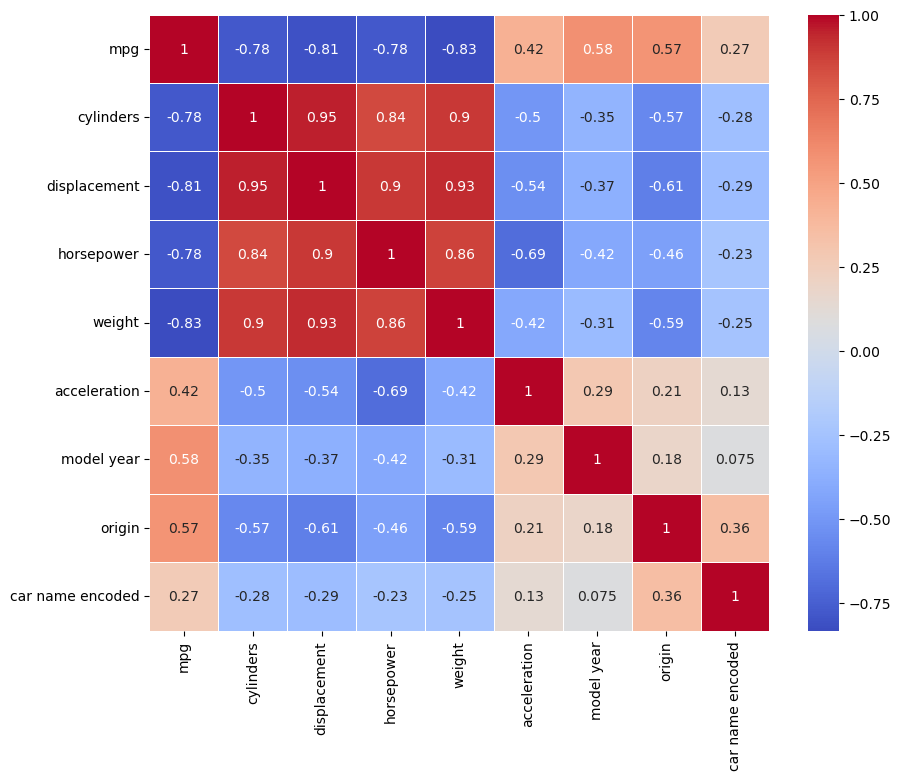

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

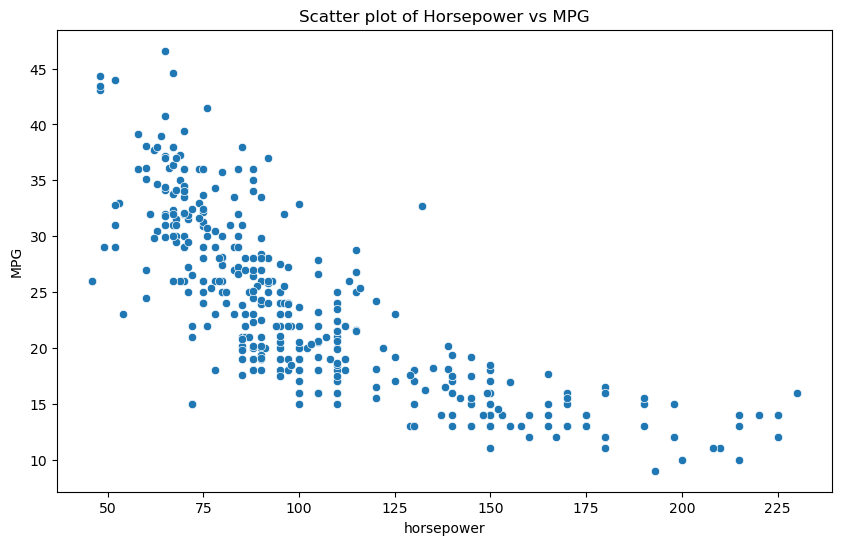

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.xlabel('horsepower')
plt.ylabel('MPG')
plt.title('Scatter plot of Horsepower vs MPG')
plt.show()

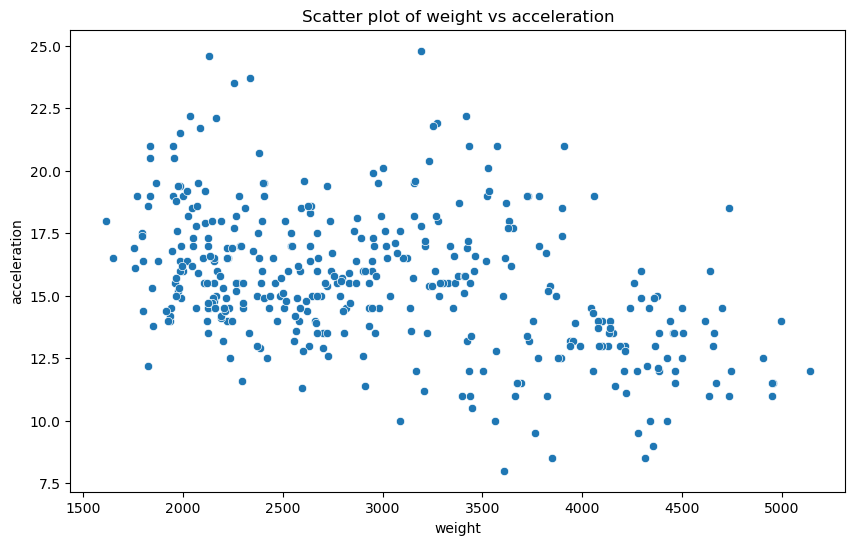

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='weight', y='acceleration', data=df)
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.title('Scatter plot of weight vs acceleration')
plt.show()

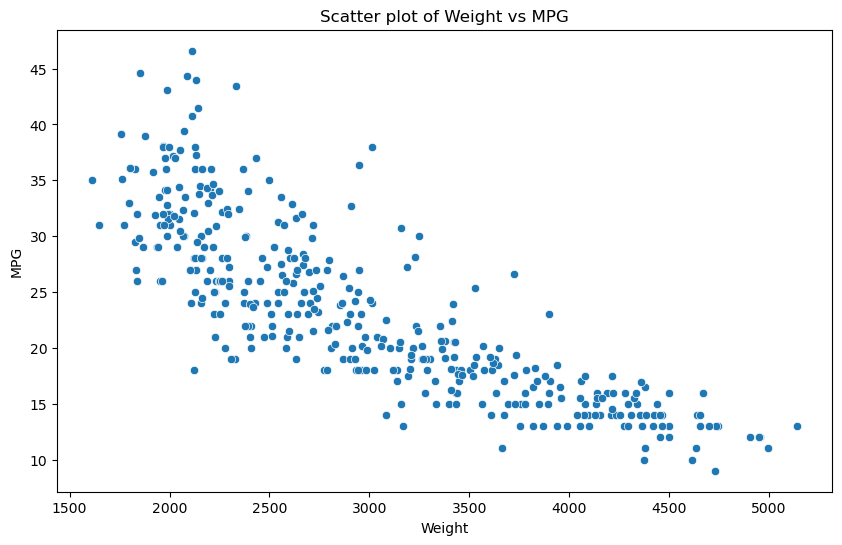

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter plot of Weight vs MPG')
plt.show()

In [23]:
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})

# If you want to replace it back to numerical
df['origin'] = df['origin'].replace({'USA': 1, 'Europe': 2, 'Japan': 3})

# Display the updated DataFrame
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car name encoded
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,48
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,35
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,229
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,159
